# Premier League 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline
import os

In [2]:
os.chdir("D:\DataSet\EPL")

In [32]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
stats_csv = pd.read_csv('stats.csv') 
results_csv= pd.read_csv('results.csv')

In [6]:
stats_csv.head()

team  wins  losses  goals  total_yel_card  total_red_card  \
0  Manchester United  28.0     5.0   83.0            60.0             1.0   
1            Chelsea  24.0     3.0   64.0            62.0             4.0   
2          Liverpool  20.0    10.0   57.0            44.0             0.0   
3            Arsenal  19.0     8.0   63.0            59.0             3.0   
4  Tottenham Hotspur  17.0    12.0   57.0            48.0             3.0   

   total_scoring_att  ontarget_scoring_att  hit_woodwork  att_hd_goal  \
0              698.0                 256.0          21.0         12.0   
1              636.0                 216.0          14.0         16.0   
2              668.0                 214.0          15.0          8.0   
3              638.0                 226.0          19.0         10.0   
4              520.0                 184.0           6.0          5.0   

   att_pen_goal  att_freekick_goal  att_ibox_goal  att_obox_goal  \
0           5.0                1.0           72.0           11.0   
1           3.0                6.0           41.0           23.0   
2           6.0                1.0           46.0           11.0   
3          10.0                3.0           53.0           10.0   
4           6.0                2.0           44.0           13.0   

   goal_fastbreak  total_offside  clean_sheet  goals_conceded  saves  \
0             9.0           80.0         16.0            27.0    2.0   
1             6.0          127.0         22.0            24.0    4.0   
2             3.0          120.0         20.0            27.0    1.0   
3             7.0          111.0         12.0            35.0    6.0   
4             9.0          149.0          6.0            54.0   11.0   

   outfielder_block  interception  total_tackle  last_man_tackle  \
0              81.0         254.0         890.0              1.0   
1              74.0         292.0         982.0              0.0   
2              65.0         246.0         969.0              2.0   
3              73.0         214.0         998.0              1.0   
4             128.0         276.0         995.0              2.0   

   total_clearance  head_clearance  own_goals  penalty_conceded  \
0           1222.0             NaN        1.0               5.0   
1           1206.0             NaN        1.0               3.0   
2           1115.0             NaN        0.0               1.0   
3           1202.0             NaN        1.0               3.0   
4           1412.0             NaN        2.0               7.0   

   pen_goals_conceded  total_pass  total_through_ball  total_long_balls  \
0                 3.0     18723.0                 NaN            2397.0   
1                 2.0     16759.0                 NaN            2270.0   
2                 1.0     17154.0                 NaN            2800.0   
3                 3.0     18458.0                 NaN            2045.0   
4                 6.0     14914.0                 NaN            2408.0   

   backward_pass  total_cross  corner_taken  touches  big_chance_missed  \
0            NaN        918.0         258.0  25686.0                NaN   
1            NaN        897.0         231.0  24010.0                NaN   
2            NaN       1107.0         282.0  24150.0                NaN   
3            NaN        873.0         278.0  25592.0                NaN   
4            NaN        796.0         181.0  22200.0                NaN   

   clearance_off_line  dispossessed  penalty_save  total_high_claim  punches  \
0                 1.0           NaN           2.0              37.0     25.0   
1                 2.0           NaN           1.0              74.0     22.0   
2                 1.0           NaN           0.0              51.0     27.0   
3                 1.0           NaN           0.0              88.0     27.0   
4                 2.0           NaN           0.0              51.0     24.0   

      season  
0  2006-2007  
1  2006-2007  
2  2006-2007  
3  2006-2007  
4 

In [7]:
stats_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

In [8]:
results_csv.head()

home_team         away_team  home_goals  away_goals result  \
0  Sheffield United         Liverpool         1.0         1.0      D   
1           Arsenal       Aston Villa         1.0         1.0      D   
2           Everton           Watford         2.0         1.0      H   
3  Newcastle United    Wigan Athletic         2.0         1.0      H   
4        Portsmouth  Blackburn Rovers         3.0         0.0      H   

      season  
0  2006-2007  
1  2006-2007  
2  2006-2007  
3  2006-2007  
4  2006-2007

In [9]:
results_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


In [10]:
display(results_csv.select_dtypes(include=['object']).describe())
for colname in results_csv.select_dtypes(include=['object']).columns:
    display(pd.DataFrame(results_csv.select_dtypes(include=['object']).loc[:,colname].value_counts()))

home_team  away_team result     season
count       4560       4560   4560       4560
unique        39         39      3         12
top      Arsenal  Liverpool      H  2006-2007
freq         228        228   2108        380

home_team
Arsenal                         228
Everton                         228
Liverpool                       228
Manchester City                 228
Manchester United               228
Chelsea                         228
Tottenham Hotspur               228
West Ham United                 209
Aston Villa                     190
Newcastle United                190
Stoke City                      190
Sunderland                      190
West Bromwich Albion            171
Fulham                          152
Swansea City                    133
Wigan Athletic                  133
Bolton Wanderers                114
Blackburn Rovers                114
Southampton                     114
Hull City                        95
Crystal Palace                   95
Watford                          76
Burnley                          76
Leicester City                   76
Norwich City                     76
Portsmouth                       76
Middlesbrough                    76
AFC Bournemouth                  57
Birmingham City                  57
Wolverhampton Wanderers          57
Queens Park Rangers              57
Reading                          57
Cardiff City                     19
Brighton and Hove Albion         19
Sheffield United                 19
Blackpool                        19
Derby County                     19
Charlton Athletic                19
Huddersfield Town                19

away_team
Liverpool                       228
Everton                         228
Arsenal                         228
Chelsea                         228
Tottenham Hotspur               228
Manchester United               228
Manchester City                 228
West Ham United                 209
Stoke City                      190
Sunderland                      190
Aston Villa                     190
Newcastle United                190
West Bromwich Albion            171
Fulham                          152
Swansea City                    133
Wigan Athletic                  133
Blackburn Rovers                114
Bolton Wanderers                114
Southampton                     114
Hull City                        95
Crystal Palace                   95
Norwich City                     76
Middlesbrough                    76
Leicester City                   76
Watford                          76
Portsmouth                       76
Burnley                          76
AFC Bournemouth                  57
Queens Park Rangers              57
Reading                          57
Wolverhampton Wanderers          57
Birmingham City                  57
Blackpool                        19
Derby County                     19
Cardiff City                     19
Charlton Athletic                19
Sheffield United                 19
Huddersfield Town                19
Brighton and Hove Albion         19

result
H    2108
A    1288
D    1164

season
2006-2007     380
2007-2008     380
2008-2009     380
2009-2010     380
2010-2011     380
2011-2012     380
2012-2013     380
2013-2014     380
2014-2015     380
2015-2016     380
2016-2017     380
2017-2018     380

In [11]:
results_csv.select_dtypes(include=['float64']).describe()

home_goals   away_goals
count  4560.000000  4560.000000
mean      1.543202     1.144298
std       1.315163     1.139824
min       0.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     1.000000
75%       2.000000     2.000000
max       9.000000     7.000000

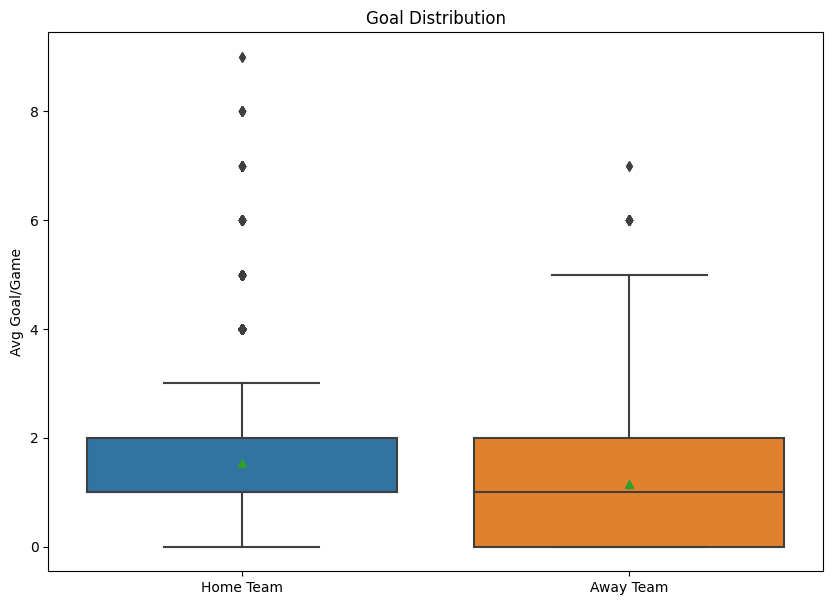

In [12]:
fig,ax6 = plt.subplots(1,1)
fig.set_size_inches(10,7)
sns.boxplot(data=results_csv.select_dtypes(include=['float64']), ax=ax6,showmeans=True)
ax6.set_title("Goal Distribution")
ax6.set_xticklabels(['Home Team',"Away Team"])
ax6.set_ylabel('Avg Goal/Game')
plt.show()


C:\Users\Upender\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


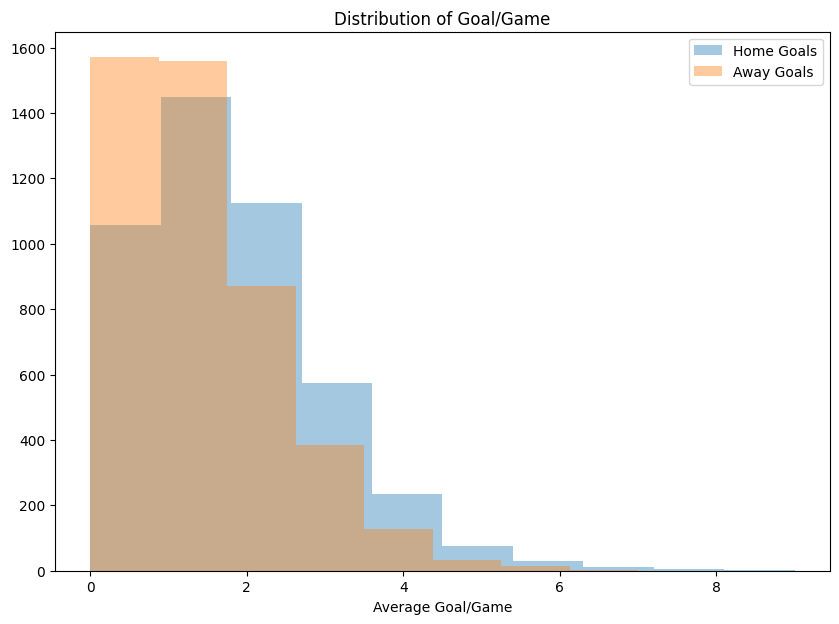

In [15]:
fig,ax7 = plt.subplots(1,1)
fig.set_size_inches(10,7)
sns.distplot(results_csv.select_dtypes(include=['float64']).loc[:,'home_goals'], ax=ax7,label='Home Goals',hist=True,\
            kde = False,bins = 10)
sns.distplot(results_csv.select_dtypes(include=['float64']).loc[:,'away_goals'], ax=ax7,label='Away Goals',hist=True,\
            kde = False, bins = 8)
ax7.set_xlabel("Average Goal/Game")
ax7.set_title("Distribution of Goal/Game")
plt.legend()
plt.show()

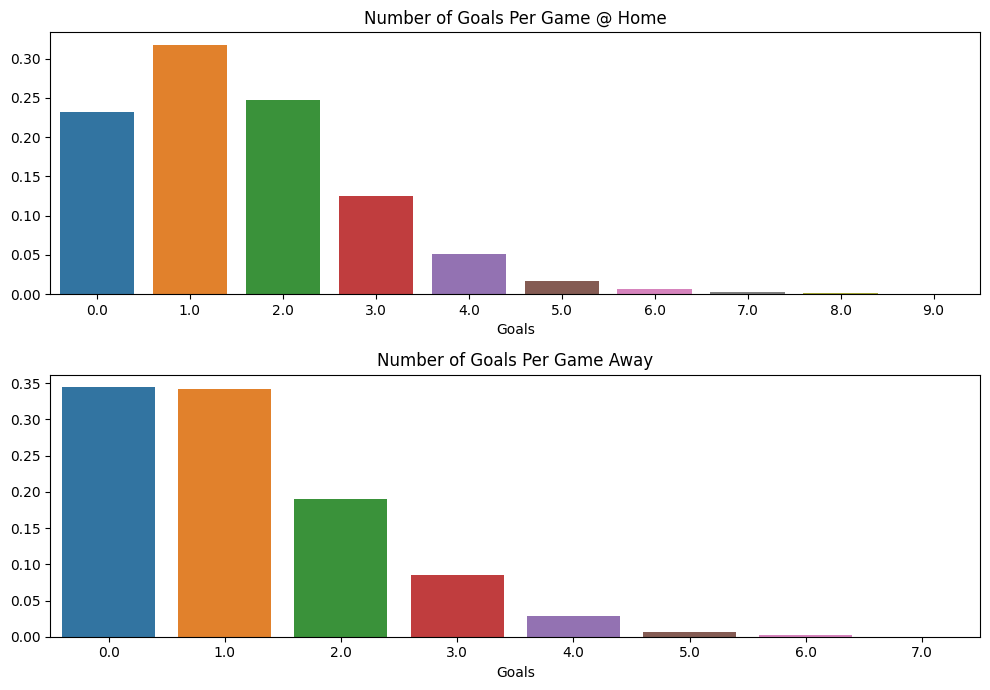

In [16]:
temp = results_csv.select_dtypes(include=['float64']).loc[:,'home_goals'].value_counts().reset_index()
temp1 = results_csv.select_dtypes(include=['float64']).loc[:,'away_goals'].value_counts().reset_index()
temp['home_goals_percentage'] = temp.loc[:,['home_goals']].apply(lambda x: x/temp.home_goals.sum())
temp1['away_goals_percentage'] = temp1.loc[:,['away_goals']].apply(lambda x: x/temp1.away_goals.sum())
fig,ax8 = plt.subplots(2,1)
fig.set_size_inches(10,7)
sns.barplot(data = temp, x = 'index',y='home_goals_percentage',ax=ax8[0])
ax8[0].set_xlabel('Goals')
ax8[0].set_ylabel('')
ax8[0].set_title("Number of Goals Per Game @ Home")
sns.barplot(data = temp1, x = 'index',y='away_goals_percentage',ax=ax8[1])
ax8[1].set_xlabel('Goals')
ax8[1].set_ylabel('')
ax8[1].set_title("Number of Goals Per Game Away")
plt.tight_layout()

In [17]:
results_csv_result = pd.get_dummies(results_csv.loc[:,['result']]).iloc[:,[0,2]]
results_csv_result.head()

result_A  result_H
0         0         0
1         0         0
2         0         1
3         0         1
4         0         1

In [33]:
results_csv_plt = \
results_csv.loc[:,['home_team','result','season','home_goals']].groupby(['home_team','result','season']).count().reset_index()
season_lsts = results_csv_plt.season.value_counts().index.tolist()
season_lsts.sort()
season_lsts

['2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018']

In [34]:
home_result = results_csv.loc[:,['home_team','result','season','home_goals']].groupby(['home_team','result','season']).count().\
sort_values(by=['home_team','season','home_goals']).reset_index()
home_result.loc[:,'result'] = home_result.loc[:,'result'].apply(lambda x: 'W' if x == 'H' else ('L' if x == 'A' else 'D'))
home_result.columns = home_result.columns[0:3].tolist() + ['NumOfGames']
home_result.head()

home_team result     season  NumOfGames
0  AFC Bournemouth      D  2015-2016           5
1  AFC Bournemouth      W  2015-2016           5
2  AFC Bournemouth      L  2015-2016           9
3  AFC Bournemouth      D  2016-2017           4
4  AFC Bournemouth      L  2016-2017           6

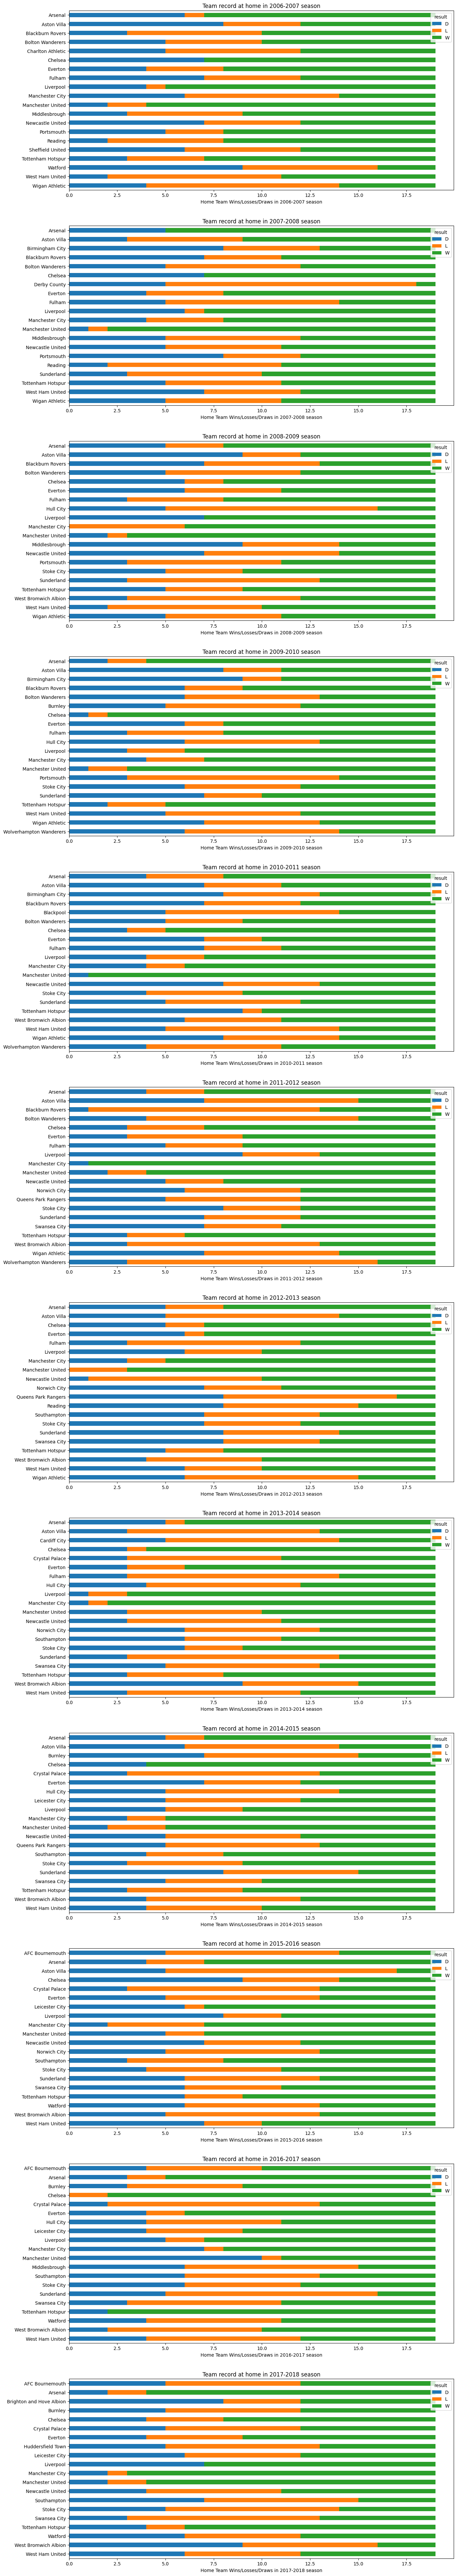

In [35]:
fig, ax1 = plt.subplots(12,1)
fig.set_size_inches(15,100)
for season_lst,i in zip(season_lsts,range(12)):
        home_result.loc[home_result.season == season_lst,['home_team','result','NumOfGames']].set_index('home_team').\
        pivot_table(values = 'NumOfGames',index = ['home_team'],columns = ['result']).sort_index(ascending = False).\
        plot(kind = 'barh',stacked = True,ax = ax1[i])
        ax1[i].set_title('Team record at home in {} season'.format(season_lst))
        ax1[i].set_xlabel('Home Team Wins/Losses/Draws in {} season'.format(season_lst))
        ax1[i].set_ylabel('')

In [37]:
away_result = results_csv.loc[:,['away_team','result','season','away_goals']].groupby(['away_team','result','season']).count().\
sort_values(by=['away_team','season','away_goals']).reset_index()
away_result.loc[:,'result'] = away_result.loc[:,'result'].apply(lambda x: 'W' if x == 'A' else ('L' if x == 'H' else 'D'))
away_result.columns = away_result.columns[0:3].tolist() + ['NumOfGames']
away_result.head()

away_team result     season  NumOfGames
0  AFC Bournemouth      D  2015-2016           4
1  AFC Bournemouth      W  2015-2016           6
2  AFC Bournemouth      L  2015-2016           9
3  AFC Bournemouth      W  2016-2017           3
4  AFC Bournemouth      D  2016-2017           6

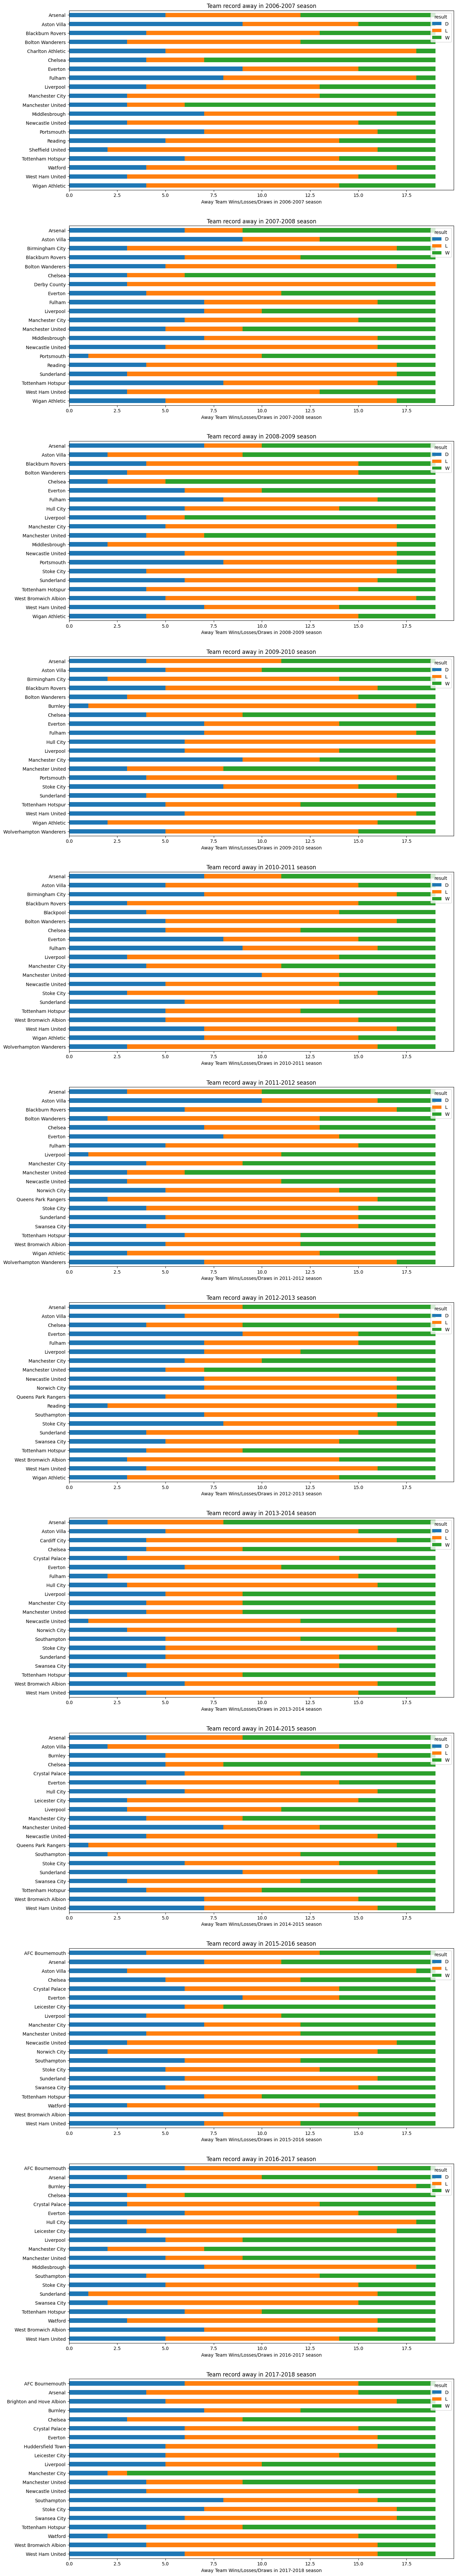

In [38]:
fig, ax2 = plt.subplots(12,1)
fig.set_size_inches(15,100)
for season_lst,i in zip(season_lsts,range(12)):
        away_result.loc[away_result.season == season_lst,['away_team','result','NumOfGames']].set_index('away_team').\
        pivot_table(values = 'NumOfGames',index = ['away_team'],columns = ['result']).sort_index(ascending = False).\
        plot(kind = 'barh',stacked = True,ax = ax2[i])
        ax2[i].set_title('Team record away in {} season'.format(season_lst))
        ax2[i].set_xlabel('Away Team Wins/Losses/Draws in {} season'.format(season_lst))
        ax2[i].set_ylabel('')

In [42]:
for j in range(1,len(season_lsts)):
    tmp = results_csv.loc[:,['home_team','season','result']].groupby(['season','home_team']).count()
    relegated_teams = set(tmp.loc[season_lsts[j-1],:].index.tolist())-set(tmp.loc[season_lsts[j],:].index.tolist())
    promoted_teams = set(tmp.loc[season_lsts[j],:].index.tolist())-set(tmp.loc[season_lsts[j-1],:].index.tolist())
    teams_tbl = pd.DataFrame({'Relegated Team in '+season_lsts[j-1]:list(relegated_teams),'Promoted Teams in '+season_lsts[j]:list(promoted_teams)})
    display(teams_tbl)


Relegated Team in 2006-2007 Promoted Teams in 2007-2008
0            Sheffield United                Derby County
1           Charlton Athletic                  Sunderland
2                     Watford             Birmingham City

Relegated Team in 2007-2008 Promoted Teams in 2008-2009
0                Derby County                  Stoke City
1                     Reading        West Bromwich Albion
2             Birmingham City                   Hull City

Relegated Team in 2008-2009 Promoted Teams in 2009-2010
0            Newcastle United                     Burnley
1        West Bromwich Albion     Wolverhampton Wanderers
2               Middlesbrough             Birmingham City

Relegated Team in 2009-2010 Promoted Teams in 2010-2011
0                  Portsmouth                   Blackpool
1                     Burnley            Newcastle United
2                   Hull City        West Bromwich Albion

Relegated Team in 2010-2011 Promoted Teams in 2011-2012
0                   Blackpool                Norwich City
1             West Ham United         Queens Park Rangers
2             Birmingham City                Swansea City

Relegated Team in 2011-2012 Promoted Teams in 2012-2013
0            Bolton Wanderers                 Southampton
1            Blackburn Rovers             West Ham United
2     Wolverhampton Wanderers                     Reading

Relegated Team in 2012-2013 Promoted Teams in 2013-2014
0              Wigan Athletic              Crystal Palace
1         Queens Park Rangers                Cardiff City
2                     Reading                   Hull City

Relegated Team in 2013-2014 Promoted Teams in 2014-2015
0                Norwich City         Queens Park Rangers
1                      Fulham              Leicester City
2                Cardiff City                     Burnley

Relegated Team in 2014-2015 Promoted Teams in 2015-2016
0         Queens Park Rangers                Norwich City
1                     Burnley             AFC Bournemouth
2                   Hull City                     Watford

Relegated Team in 2015-2016 Promoted Teams in 2016-2017
0                Norwich City               Middlesbrough
1                 Aston Villa                     Burnley
2            Newcastle United                   Hull City

Relegated Team in 2016-2017 Promoted Teams in 2017-2018
0                  Sunderland            Newcastle United
1               Middlesbrough           Huddersfield Town
2                   Hull City    Brighton and Hove Albion

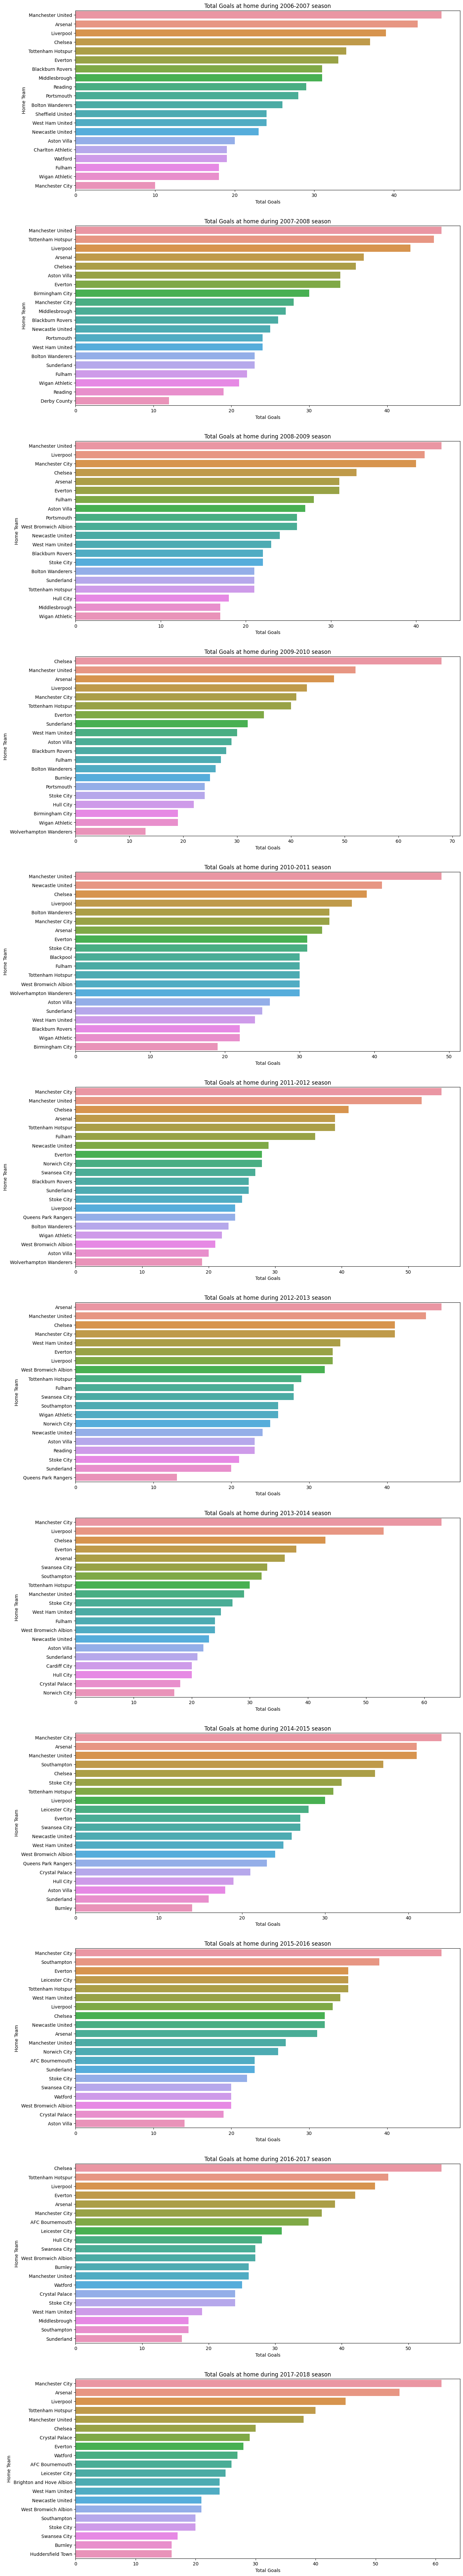

In [43]:
result_csv_goals_hometeam =results_csv.loc[:,['home_team','home_goals','season']].groupby(['season','home_team']).sum().\
reset_index().sort_values(by=['season','home_goals'],ascending=[1,0])
fig, ax3 = plt.subplots(len(season_lsts),1)
fig.set_size_inches(15,100)
for i in range(len(season_lsts)):
    sns.barplot(data = result_csv_goals_hometeam.loc[result_csv_goals_hometeam.season == season_lsts[i],:],\
                x='home_goals',y='home_team',ax=ax3[i])
    ax3[i].set_title('Total Goals at home during {} season'.format(season_lsts[i]))
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Home Team")

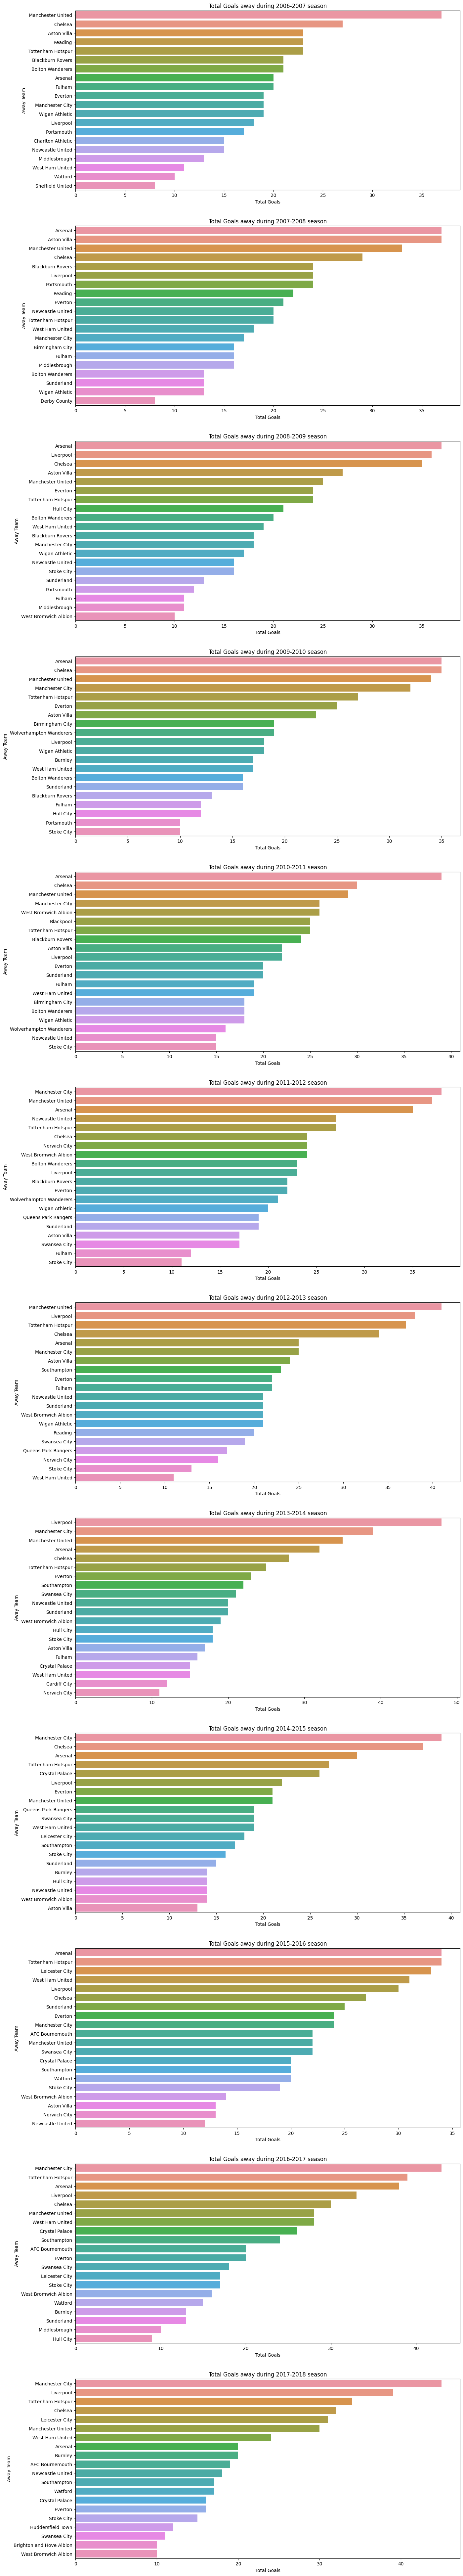

In [44]:
result_csv_goals_awayteam =results_csv.loc[:,['away_team','away_goals','season']].groupby(['season','away_team']).sum().\
reset_index().sort_values(by=['season','away_goals'],ascending=[1,0])
fig, ax4 = plt.subplots(len(season_lsts),1)
fig.set_size_inches(15,100)
for i in range(len(season_lsts)):
    sns.barplot(data = result_csv_goals_awayteam.loc[result_csv_goals_awayteam.season == season_lsts[i],:],\
                x='away_goals',y='away_team',ax=ax4[i])
    ax4[i].set_title('Total Goals away during {} season'.format(season_lsts[i]))
    ax4[i].set_xlabel("Total Goals")
    ax4[i].set_ylabel("Away Team")

In [45]:
results_csv_goaldiffhome = results_csv.loc[:,['season','home_team','home_goals','away_goals']].\
groupby(['season','home_team']).sum().apply(lambda x: x[0]-x[1],axis=1).reset_index()
results_csv_goaldiffhome.columns = [results_csv_goaldiffhome.columns[0],'TeamName','GoalDiffHome']
results_csv_goaldiffhome.head()

season           TeamName  GoalDiffHome
0  2006-2007            Arsenal          27.0
1  2006-2007        Aston Villa           6.0
2  2006-2007   Blackburn Rovers           6.0
3  2006-2007   Bolton Wanderers           6.0
4  2006-2007  Charlton Athletic          -1.0

In [46]:
results_csv_goaldiffaway = results_csv.loc[:,['season','away_team','away_goals','home_goals']].\
groupby(['season','away_team']).sum().apply(lambda x: x[0]-x[1],axis=1).reset_index()
results_csv_goaldiffaway.columns = [results_csv_goaldiffaway.columns[0],'TeamName','GoalDiffAway']
results_csv_goaldiffaway.head()

season           TeamName  GoalDiffAway
0  2006-2007            Arsenal           1.0
1  2006-2007        Aston Villa          -4.0
2  2006-2007   Blackburn Rovers          -8.0
3  2006-2007   Bolton Wanderers         -11.0
4  2006-2007  Charlton Athletic         -25.0

In [47]:
results_csv_goaldiff = \
pd.merge(results_csv_goaldiffhome, results_csv_goaldiffaway, on=['season','TeamName'])
results_csv_goaldiff['GoalDiff'] = results_csv_goaldiff.apply(lambda x: x[2]+x[3], axis=1)
results_csv_goaldiff.head()

season           TeamName  GoalDiffHome  GoalDiffAway  GoalDiff
0  2006-2007            Arsenal          27.0           1.0      28.0
1  2006-2007        Aston Villa           6.0          -4.0       2.0
2  2006-2007   Blackburn Rovers           6.0          -8.0      -2.0
3  2006-2007   Bolton Wanderers           6.0         -11.0      -5.0
4  2006-2007  Charlton Athletic          -1.0         -25.0     -26.0

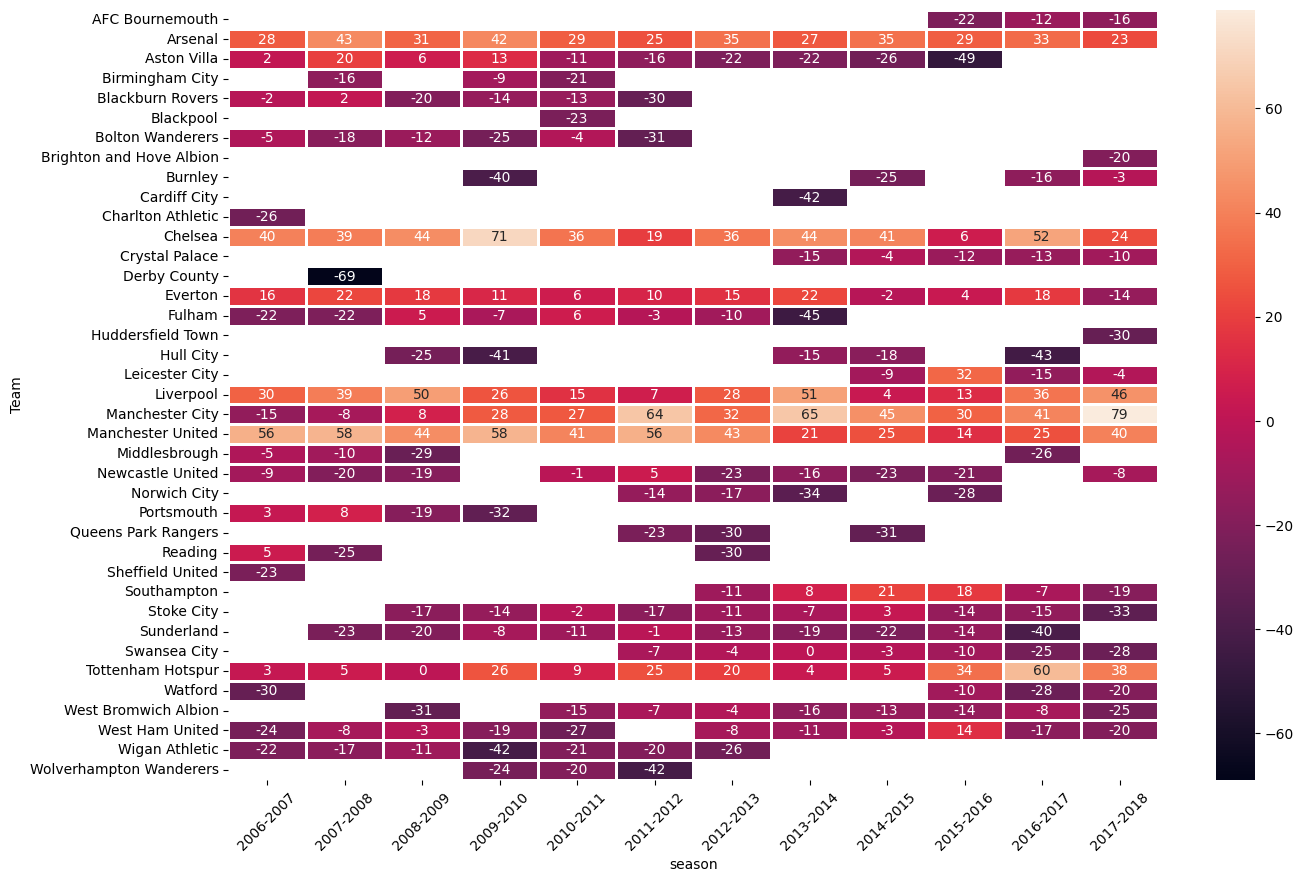

In [48]:
fig,ax10 = plt.subplots(1,1)
fig.set_size_inches(15,10)
sns.heatmap(results_csv_goaldiff.pivot('TeamName','season','GoalDiff'),ax=ax10,\
           annot=True,linewidths=1,fmt='.0f')
ax10.set_xticklabels(ax10.get_xticklabels(),rotation=45)
ax10.set_ylabel('Team')
plt.show()

In [49]:
results_csv['Home_Team_Points'] = results_csv['result'].apply(lambda x: 3 if x=='H' else (1 if x == 'D' else 0))
results_csv['Away_Team_Points'] = results_csv['result'].apply(lambda x: 3 if x=='A' else (1 if x == 'D' else 0))
results_csv.head()

home_team         away_team  home_goals  away_goals result  \
0  Sheffield United         Liverpool         1.0         1.0      D   
1           Arsenal       Aston Villa         1.0         1.0      D   
2           Everton           Watford         2.0         1.0      H   
3  Newcastle United    Wigan Athletic         2.0         1.0      H   
4        Portsmouth  Blackburn Rovers         3.0         0.0      H   

      season  Home_Team_Points  Away_Team_Points  
0  2006-2007                 1                 1  
1  2006-2007                 1                 1  
2  2006-2007                 3                 0  
3  2006-2007                 3                 0  
4  2006-2007                 3                 0

In [51]:
results_csv_home = results_csv.loc[:,['home_team','season','Home_Team_Points']].groupby(['season','home_team']).sum().reset_index()
results_csv_away = results_csv.loc[:,['away_team','season','Away_Team_Points']].groupby(['season','away_team']).sum().reset_index()
results_csv_total_points = results_csv_home.merge(results_csv_away,left_on=['season','home_team'],right_on = ['season','away_team'])
results_csv_total_points["total_points"] = results_csv_total_points.loc[:,['Home_Team_Points','Away_Team_Points']].apply(\
      np.sum,axis=1)
results_csv_total_points.head()

season          home_team  Home_Team_Points          away_team  \
0  2006-2007            Arsenal                42            Arsenal   
1  2006-2007        Aston Villa                29        Aston Villa   
2  2006-2007   Blackburn Rovers                30   Blackburn Rovers   
3  2006-2007   Bolton Wanderers                32   Bolton Wanderers   
4  2006-2007  Charlton Athletic                26  Charlton Athletic   

   Away_Team_Points  total_points  
0                26            68  
1                21            50  
2                22            52  
3                24            56  
4                 8            34

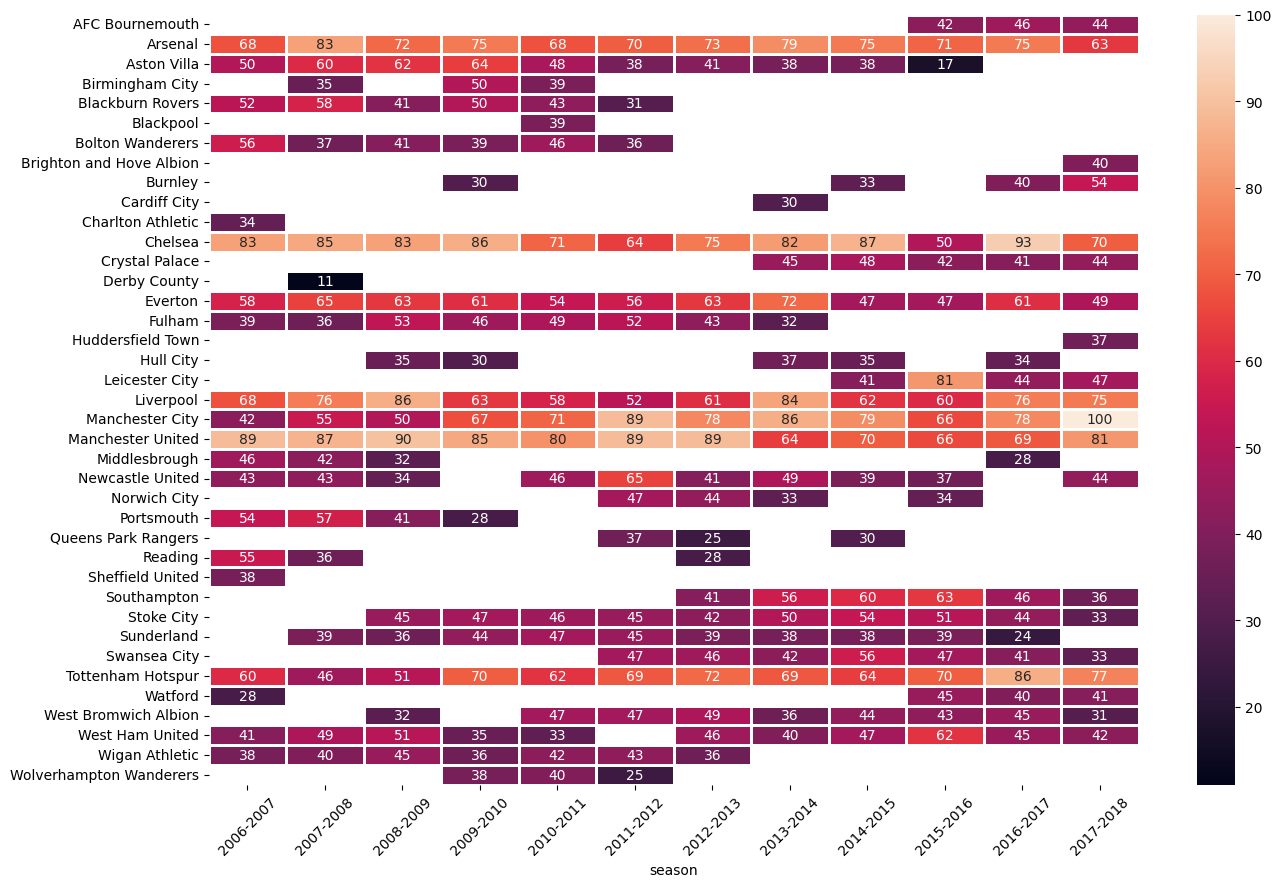

In [52]:
fig,ax9 = plt.subplots(1,1)
fig.set_size_inches(15,10)
sns.heatmap(results_csv_total_points.pivot('home_team','season','total_points'),ax=ax9,\
           annot=True,linewidths=1,fmt='.0f')
ax9.set_xticklabels(ax9.get_xticklabels(),rotation=45)
ax9.set_ylabel('')
plt.show()